# **Stock Price Prediction**

installing and importing necessary libraries and modules

In [1]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


downloading Apple stock data from yfinanace

In [2]:
# Download Apple stock data
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
print(data.head())

# Use 'Close' prices
close_prices = data['Close'].values.reshape(-1, 1)

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.538506  72.598884  71.292296  71.545882  135480400
2020-01-03  71.833282  72.594048  71.608677  71.765659  146322800
2020-01-06  72.405678  72.444321  70.703012  70.954188  118387200
2020-01-07  72.065147  72.671341  71.845369  72.415337  108872000
2020-01-08  73.224419  73.526310  71.768094  71.768094  132079200


normalizing data

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)


preparing the sequences

In [4]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

print(X.shape, y.shape)


(696, 60, 1) (696, 1)


spliting the data for training and testing

In [5]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


building LSTM model

In [6]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

training the LSTM model

In [7]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.1882 - val_loss: 0.0109
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - loss: 0.0099 - val_loss: 0.0065
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0025 - val_loss: 0.0042
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0021 - val_loss: 0.0041
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0019 - val_loss: 0.0045
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0017 - val_loss: 0.0045
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0017 - val_loss: 0.0050
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0017 - val_loss: 0.0043
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0016 - val_loss: 0.0039
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0017 - val_loss: 0.0038
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 

predicting using test data

In [8]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


visualizing using matplotlib

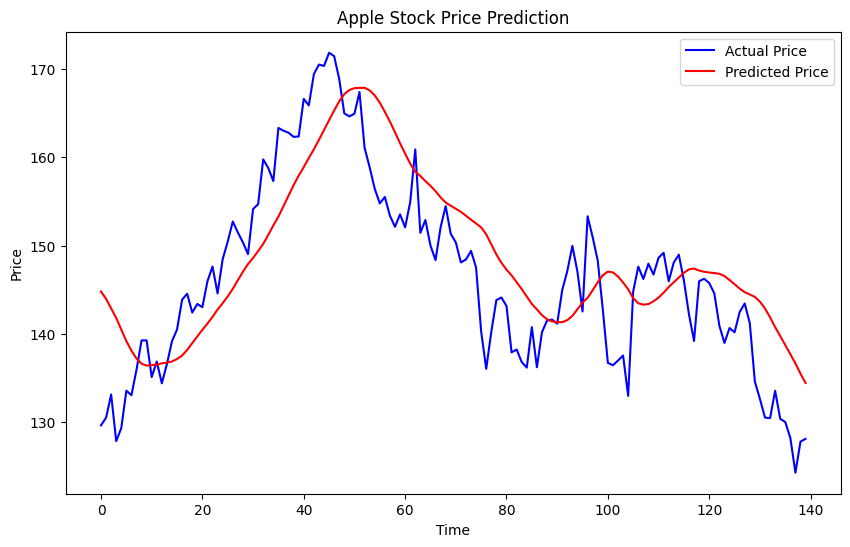

In [9]:
plt.figure(figsize=(10,6))
plt.plot(actual, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()